<a href="https://colab.research.google.com/github/SanjivaniS10/End-to-end-Machine-learning-Pipeline/blob/main/ML_pipeline_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

def load_housing_data(housing_path="datasets/housing"):
    csv_path = os.path.join(housing_path, "/content/housing_2000.csv")
    return pd.read_csv(csv_path)



In [ ]:
housing = load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.589617,35.002650,42,1534,4400,2312,2743,14.8876,172517,<1H OCEAN
1,-114.804828,34.864070,21,5788,3244,1316,1406,6.2535,222760,NEAR OCEAN
2,-117.000781,41.067856,37,2047,3687,4582,1072,6.5327,479369,NEAR OCEAN
3,-118.339469,34.888230,27,7051,176,3437,2087,2.9985,409411,<1H OCEAN
4,-122.783573,35.099047,29,7411,915,2475,2547,2.1798,119533,<1H OCEAN


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2000 non-null   float64
 1   latitude            2000 non-null   float64
 2   housing_median_age  2000 non-null   int64  
 3   total_rooms         2000 non-null   int64  
 4   total_bedrooms      2000 non-null   int64  
 5   population          2000 non-null   int64  
 6   households          2000 non-null   int64  
 7   median_income       2000 non-null   float64
 8   median_house_value  2000 non-null   int64  
 9   ocean_proximity     2000 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 156.4+ KB


In [ ]:
housing["ocean_proximity"].value_counts()#This method counts how many times each category appears in that column.

,count
ocean_proximity,
<1H OCEAN,436
INLAND,409
NEAR BAY,399
NEAR OCEAN,381
ISLAND,375


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2000.000000,2000.000000,2000.00000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-119.343685,37.211034,25.96050,5079.3850,2581.804500,2496.524000,1525.068000,7.850540,255637.660500
std,2.933796,2.715537,14.50659,2872.9973,1435.639058,1407.197211,846.488179,4.171758,142994.951146
min,-124.317689,32.540109,1.00000,202.0000,107.000000,102.000000,50.000000,0.501700,15018.000000
25%,-121.960013,34.899903,14.00000,2630.2500,1332.750000,1278.750000,818.500000,4.208425,129054.250000
50%,-119.256193,37.176254,26.00000,4975.0000,2625.500000,2441.500000,1526.000000,8.018850,252970.500000
75%,-116.813185,39.585178,39.00000,7597.2500,3858.000000,3697.000000,2246.250000,11.400025,380672.750000
max,-114.312835,41.945838,51.00000,9999.0000,4999.000000,4998.000000,2997.000000,14.997300,499948.000000


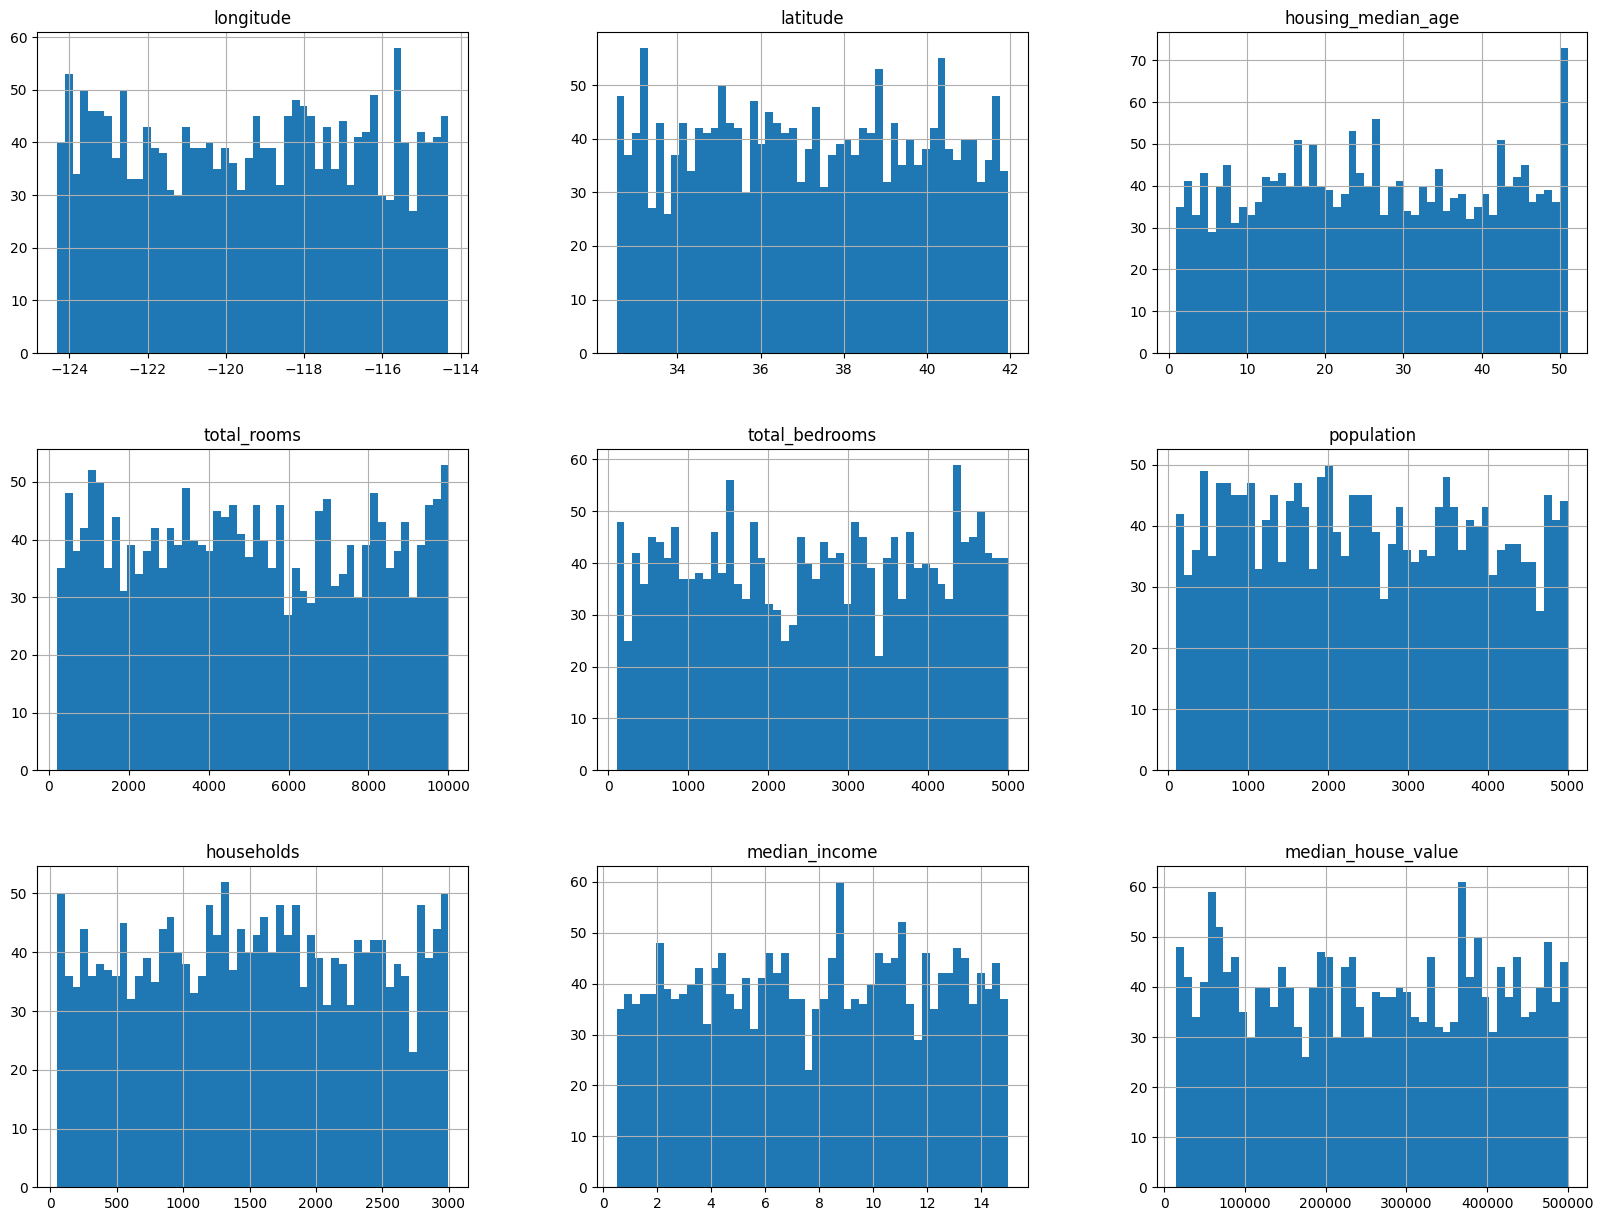

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
len(train_set)

1600

In [ ]:
len(test_set)

400

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],#Divides a continuous numerical column into discrete intervals
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<Axes: >

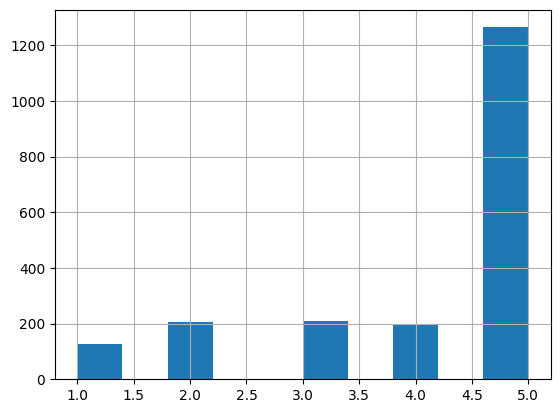

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]

  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
5,0.6325
3,0.1050
2,0.1025
4,0.0975
1,0.0625


In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

,count
income_cat,
5,0.632500
3,0.104375
2,0.102500
4,0.097500
1,0.063125


In [ ]:
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
5,0.6325
3,0.1045
2,0.1025
4,0.0975
1,0.0630


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

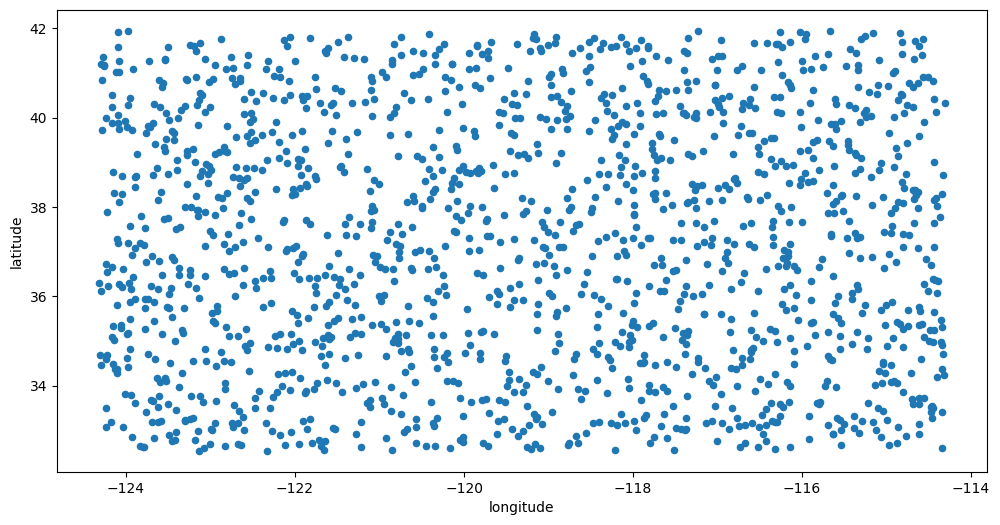

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize = (12,6))

<Axes: xlabel='longitude', ylabel='latitude'>

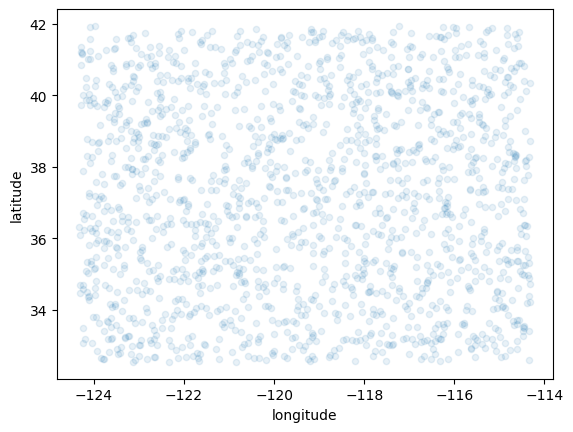

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

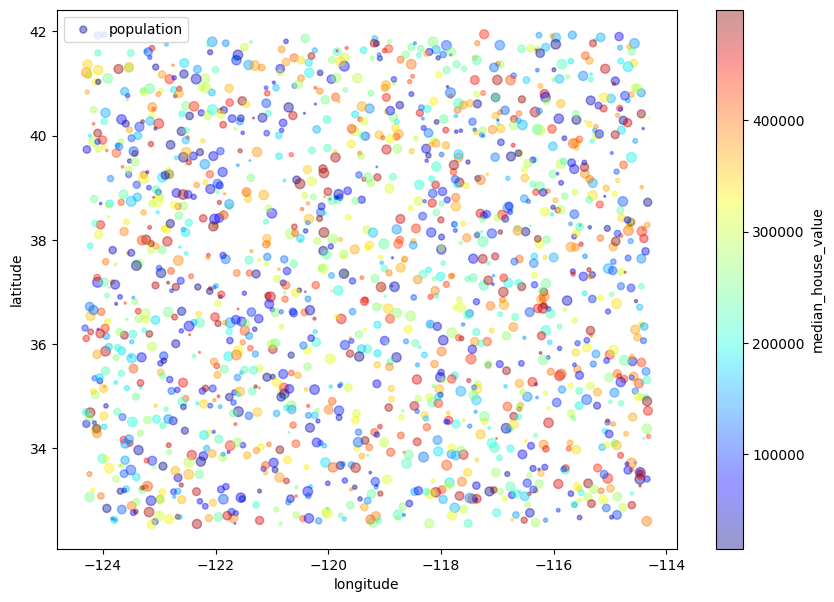

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [ ]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
population,0.044692
households,0.026876
housing_median_age,0.016158
longitude,0.015514
total_bedrooms,0.008693
median_income,0.002715
latitude,0.000093
total_rooms,-0.033970


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

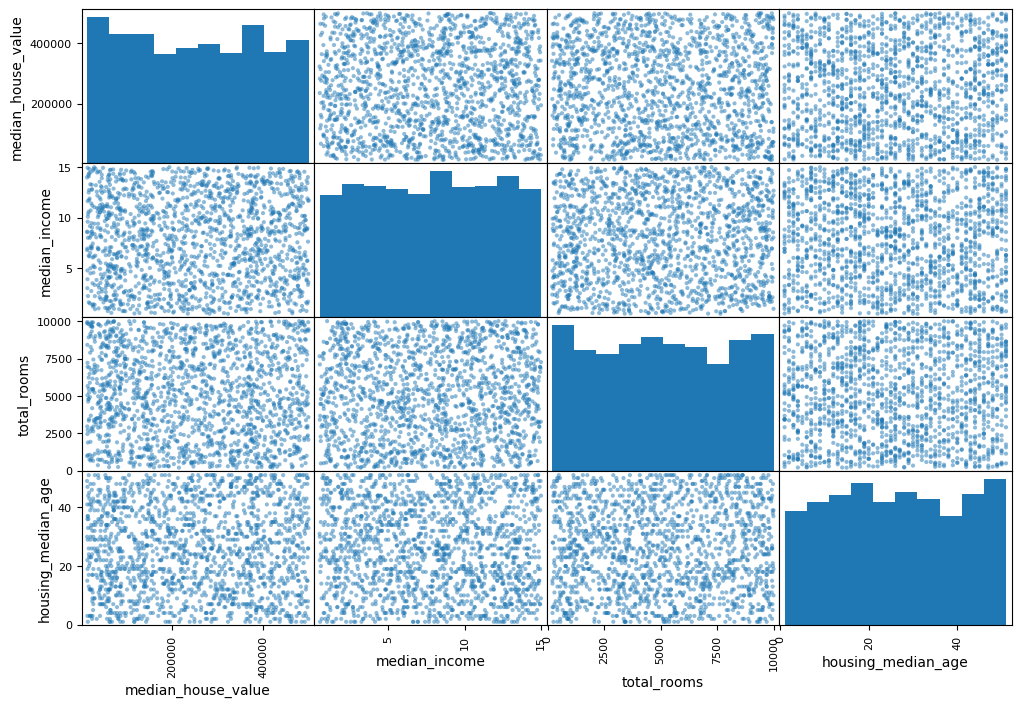

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

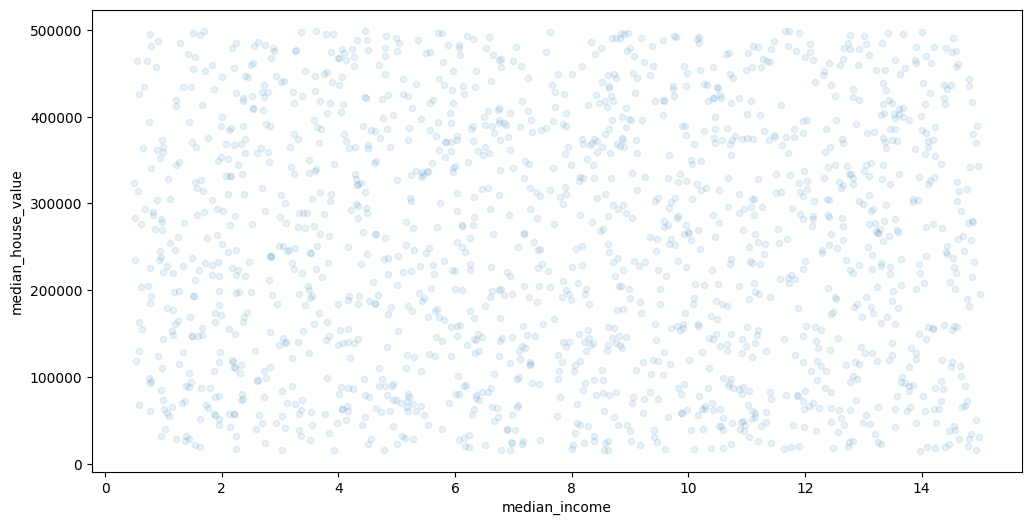

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, figsize = (12,6))

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
population,0.044692
bedrooms_per_room,0.038851
population_per_household,0.028077
households,0.026876
housing_median_age,0.016158
longitude,0.015514
total_bedrooms,0.008693
median_income,0.002715
latitude,0.000093


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

/tmp/ipython-input-43-867637120.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-119.25430788,   37.18106453,   26.        , 4996.5       ,
       2650.        , 2428.5       , 1557.5       ,    7.9715    ])

In [ ]:
housing_num.median().values

array([-119.25430788,   37.18106453,   26.        , 4996.5       ,
       2650.        , 2428.5       , 1557.5       ,    7.9715    ])

In [ ]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
1678,NEAR BAY
98,ISLAND
535,NEAR BAY
555,NEAR OCEAN
1174,ISLAND
1884,INLAND
745,ISLAND
1954,NEAR OCEAN
652,NEAR BAY
29,ISLAND


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Assume you already have a DataFrame called `housing`
housing_cat = housing[["ocean_proximity"]]  # Use double brackets to keep it as a DataFrame

# Now apply the encoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display first 10 encoded values
print(housing_cat_encoded[:10])


[[3.]
 [2.]
 [3.]
 [4.]
 [2.]
 [1.]
 [2.]
 [4.]
 [3.]
 [2.]]


In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1600 stored elements and shape (1600, 5)>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):     # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self # nothing else to do

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# ✅ Define your housing dataset first (make sure it's loaded!)
# Example: housing = pd.read_csv("housing.csv")

# ✅ Drop categorical column to keep only numerical data
housing_num = housing.drop("ocean_proximity", axis=1)

# ✅ Define the custom transformer
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 0]
        population_per_household = X[:, 2] / X[:, 1]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 1] / X[:, 0]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# ✅ Build pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# ✅ Transform data
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
           ("num", num_pipeline, num_attribs),
           ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
if "median_house_value" in housing.columns:
    housing_labels = housing["median_house_value"]
else:
    print("Column 'median_house_value' not found!")


Column 'median_house_value' not found!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

# ✅ Load the dataset (update the path if needed)
housing = pd.read_csv("housing_2000.csv")

# ✅ Separate the target label
housing_labels = housing["median_house_value"].copy()

# ✅ Drop the target and categorical column
housing_num = housing.drop(["median_house_value", "ocean_proximity"], axis=1)

# ✅ Custom transformer: assumes column order from CSV:
# ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
#  'population', 'households', 'median_income']

# For example:
# total_rooms index = 3
# total_bedrooms index = 4
# population index = 5
# households index = 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]  # total_rooms / households
        population_per_household = X[:, 5] / X[:, 6]  # population / households
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]  # total_bedrooms / total_rooms
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# ✅ Build the numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

# ✅ Transform the data
housing_prepared = num_pipeline.fit_transform(housing_num)

# ✅ Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

print("✅ Model trained successfully!")



✅ Model trained successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

# Load your housing dataset
housing = pd.read_csv("/content/housing_2000.csv")  # update the path if needed

# Separate labels
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# Separate numerical and categorical columns
housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Custom transformer
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 0]
        population_per_household = X[:, 2] / X[:, 1]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 1] / X[:, 0]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Prepare full data
housing_prepared = full_pipeline.fit_transform(housing)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# ✅ Predicting for first 5 rows
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [264586.63866813 258834.00585437 266929.52462255 276530.52841193
 263700.45037129]
Labels: [172517, 222760, 479369, 409411, 119533]


In [ ]:
print("Labels:", list(some_labels))

Labels: [172517, 222760, 479369, 409411, 119533]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(142370.63270248973)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):

  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [189089.73056285 194880.0491044  201435.98897661 199520.74791966
 212395.95508158 190958.4252556  205691.59394404 204528.50676665
 214659.12614803 202326.24345074]
Mean: 201548.6367210162
Standard deviation: 7950.909669613689


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [140950.76840403 141749.44177043 140670.44207916 142639.82943017
 147322.17208882 146459.57315028 150591.46768004 135858.10011242
 145702.15800373 142204.65845837]
Mean: 143414.86111774607
Standard deviation: 3960.048876327992


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse_score = np.sqrt(forest_mse)

forest_rmse_score

display_scores(forest_rmse_score)

Scores: 54006.92270648365
Mean: 54006.92270648365
Standard deviation: 0.0


In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [139958.16305738 143558.74015181 144600.61914049 145309.13377067
 147526.06282675 145599.01301439 149052.11316386 136490.72582909
 147766.1692675  143648.4333349 ]
Mean: 144350.91735568488
Standard deviation: 3585.874210631825


In [ ]:
import joblib
my_model = forest_reg
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

168739.59317580282 {'max_features': 2, 'n_estimators': 3}
149909.48778948394 {'max_features': 2, 'n_estimators': 10}
145941.21665484956 {'max_features': 2, 'n_estimators': 30}
166461.36930835317 {'max_features': 4, 'n_estimators': 3}
150823.84352570702 {'max_features': 4, 'n_estimators': 10}
146671.68241973323 {'max_features': 4, 'n_estimators': 30}
165304.53570176353 {'max_features': 6, 'n_estimators': 3}
151884.48626911498 {'max_features': 6, 'n_estimators': 10}
146813.06769019648 {'max_features': 6, 'n_estimators': 30}
167627.43670377752 {'max_features': 8, 'n_estimators': 3}
152791.43523541163 {'max_features': 8, 'n_estimators': 10}
147190.85596300443 {'max_features': 8, 'n_estimators': 30}
165238.95527272517 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
150164.78123305875 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
163623.7466098542 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
152702.11722423628 {'bootstrap': False, 'max_features': 3, 'n_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09177601, 0.08428417, 0.07431193, 0.08535695, 0.08874589,
       0.09229531, 0.08977871, 0.08684536, 0.08844723, 0.08715156,
       0.08472884, 0.0095761 , 0.00969694, 0.0090613 , 0.00848678,
       0.00945692])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.0922953077108421), 'population'),
 (np.float64(0.09177600933684932), 'longitude'),
 (np.float64(0.08977870942652669), 'households'),
 (np.float64(0.08874589262690555), 'total_bedrooms'),
 (np.float64(0.0884472323438469), 'rooms_per_hhold'),
 (np.float64(0.08715155603771543), 'pop_per_hhold'),
 (np.float64(0.08684535667609916), 'median_income'),
 (np.float64(0.08535694770342764), 'total_rooms'),
 (np.float64(0.08472883896462986), 'bedrooms_per_room'),
 (np.float64(0.08428417160452133), 'latitude'),
 (np.float64(0.07431193136198155), 'housing_median_age'),
 (np.float64(0.009696936146954521), 'INLAND'),
 (np.float64(0.009576104337590206), '<1H OCEAN'),
 (np.float64(0.009456924493437706), 'NEAR OCEAN'),
 (np.float64(0.00906130323302903), 'ISLAND'),
 (np.float64(0.008486777995643078), 'NEAR BAY')]

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

np.float64(56197.10615709956)

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([52648.71853139, 59534.37593414])